In [1]:
import pandas as pd
df = pd.read_csv(filepath_or_buffer='/kaggle/input/ufo-sightings-around-the-world-better/ufo-sightings-transformed.csv', index_col=[0])
df.head()

,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
0,1949-10-10 20:30:00,4/27/2004,1949,10,20,Autumn,USA,United States,Texas,San Marcos,29.883056,-97.941111,Cylinder,2700.0,45 minutes,This event took place in early fall around 194...
1,1949-10-10 21:00:00,12/16/2005,1949,10,21,Autumn,USA,United States,Texas,Bexar County,29.384210,-98.581082,Light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...
2,1955-10-10 17:00:00,1/21/2008,1955,10,17,Autumn,GBR,United Kingdom,England,Chester,53.200000,-2.916667,Circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...
3,1956-10-10 21:00:00,1/17/2004,1956,10,21,Autumn,USA,United States,Texas,Edna,28.978333,-96.645833,Circle,20.0,1/2 hour,My older brother and twin sister were leaving ...
4,1960-10-10 20:00:00,1/22/2004,1960,10,20,Autumn,USA,United States,Hawaii,Kaneohe,21.418056,-157.803611,Light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...


If UFOs are manned by aliens we would expect sightings to be distributed like the world population, wouldn't we? Let's find out.

In [2]:
from plotly.express import scatter_geo
scatter_geo(data_frame=df.sample(n=1000, random_state=2023), lat='latitude', lon='longitude', color='Country')

In [3]:
scatter_geo(data_frame=df[df['Country'] != 'United States'], lat='latitude', lon='longitude', color='Country', title='All sightings ex-United States')

We can plot all of the data if we omit the US data, but if we include it we need to take a sample.

In [4]:
from plotly.express import histogram
histogram(data_frame=df, x='Year')

In [5]:
histogram(data_frame=df, x='longitude')

Almost all UFO sightings happen in the United States. 

In [6]:
from plotly.express import bar
bar(data_frame=df['UFO_shape'].value_counts().to_frame().reset_index(), x='UFO_shape', y='count', )

In [7]:
bar(data_frame=df[['UFO_shape', 'Country']].value_counts().to_frame().reset_index(), x='UFO_shape', y='count', color='Country')

Almost all UFO sightings occur in the United States across all shapes.

(-0.5, 1199.5, 1199.5, -0.5)

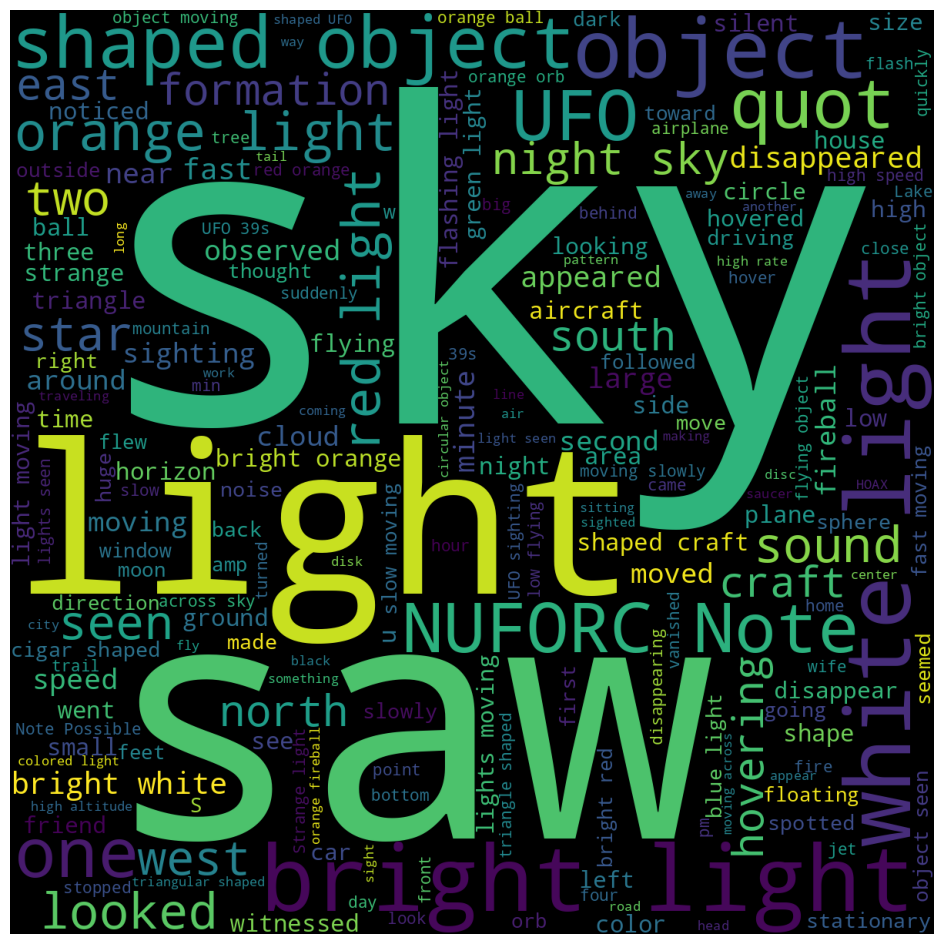

In [8]:
from matplotlib.pyplot import subplots
from matplotlib.pyplot import axis
from matplotlib.pyplot import imshow
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords=STOPWORDS
subplots(figsize=(12, 12))
text = ' '.join(df['Description'].fillna(value='').values)
imshow(X=WordCloud(random_state=2023, height=1200, width=1200, stopwords=stopwords).generate(text=text), )
axis('off')